In [3]:
import os
import soundfile as sf
import textgrid
import numpy as np

from prosody_tools.energy_processing import extract_energy  # use your module path

# Path to your folder with .wav and .TextGrid files
data_dir = r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\converted_wav\84\121123"
# Sampling rate used in your audio
target_rate = 16000  # update if your wav files are a different rate

results = []

for file in os.listdir(data_dir):
    if file.endswith(".TextGrid"):
        file_id = file.replace(".TextGrid", "")
        tg_path = os.path.join(data_dir, file)
        wav_path = os.path.join(data_dir, f"{file_id}.wav")

        if not os.path.exists(wav_path):
            print(f"Missing wav: {wav_path}")
            continue

        # Load audio
        waveform, sr = sf.read(wav_path)
        if len(waveform.shape) > 1:  # stereo to mono
            waveform = waveform.mean(axis=1)

        # Parse TextGrid
        tg = textgrid.TextGrid.fromFile(tg_path)
        word_tier = tg.getFirst("words")  # assumes tier is named "words"

        for interval in word_tier:
            word = interval.mark.strip()
            if not word:  # skip silence or empty
                continue

            start_sec = float(interval.minTime)
            end_sec = float(interval.maxTime)

            # Slice waveform by time
            start_idx = int(start_sec * sr)
            end_idx = int(end_sec * sr)
            word_audio = waveform[start_idx:end_idx]

            if len(word_audio) == 0:
                continue

            # Extract energy
            energy = extract_energy(word_audio, fs=sr, target_rate=200)
            energy_mean = float(np.mean(energy))

            results.append({
                "file_id": file_id,
                "word": word,
                "start": start_sec,
                "end": end_sec,
                "mean_energy": energy_mean
            })

# ✅ Print sample
for r in results[:10]:
    print(r)


{'file_id': '84-121123-0000', 'word': 'go', 'start': 0.52, 'end': 0.86, 'mean_energy': 0.07334185220917248}
{'file_id': '84-121123-0000', 'word': 'do', 'start': 1.3, 'end': 1.38, 'mean_energy': 0.043559661778653155}
{'file_id': '84-121123-0000', 'word': 'you', 'start': 1.38, 'end': 1.49, 'mean_energy': 0.13233363913670304}
{'file_id': '84-121123-0000', 'word': 'hear', 'start': 1.49, 'end': 1.91, 'mean_energy': 0.07596438160030115}
{'file_id': '84-121123-0001', 'word': 'but', 'start': 0.3, 'end': 0.42, 'mean_energy': 0.089789403184249}
{'file_id': '84-121123-0001', 'word': 'in', 'start': 0.42, 'end': 0.53, 'mean_energy': 0.14485594982743477}
{'file_id': '84-121123-0001', 'word': 'less', 'start': 0.53, 'end': 0.75, 'mean_energy': 0.07032747831793149}
{'file_id': '84-121123-0001', 'word': 'than', 'start': 0.75, 'end': 0.86, 'mean_energy': 0.07698933514462812}
{'file_id': '84-121123-0001', 'word': 'five', 'start': 0.86, 'end': 1.1, 'mean_energy': 0.04451741396190323}
{'file_id': '84-121123

In [1]:
from feature_extractors import ProsodyFeatureExtractor

extractor = ProsodyFeatureExtractor(
    lab_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\lab_words",  # should be *.lab files (converted TextGrid or .lab)
    wav_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\converted_wav",
    phoneme_lab_root=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\lab_phonemes",  # can also be from MFA alignment
    celex_path= None, #"path/to/celex/dictionary",  # required if f0_stress_localizer is "celex"
    extract_f0=True,
    extract_energy=True,
    extract_word_duration=True,
    extract_duration=True,
    extract_pause_before=True,
    extract_pause_after=True,
    extract_prominence=True,
    f0_mode="dct",
    f0_n_coeffs=4,
    energy_mode="mean",
    word_duration_mode="syllable_norm",
    prominence_mode="mean"
)


Extracted features ----: ['f0', 'energy', 'word_duration', 'duration', 'pause_before', 'pause_after', 'prominence']


Extracting Features from Readers: 100%|██████████| 40/40 [46:50<00:00, 70.26s/it]


{
  "reader": "84",
  "book": "121123",
  "filename": "84-121123-0000",
  "text": "...",
  "features": {
    "f0_parameterized": [...],
    "energy": [...],
    "word_duration": [...],
    "duration": [...],
    "pause_before": [...],
    "pause_after": [...],
    "prominence": [...]
  },
  ...
}


In [2]:
import matplotlib.pyplot as plt

def plot_prosody_features(extractor, idx=0):
    sample = extractor[idx]
    words = sample["features"]["words"]
    f0 = sample["features"]["f0_parameterized"]
    prominence = sample["features"]["prominence"]

    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.set_title(f"Prosody Features for Sample {sample['filename']}")
    ax1.plot(prominence, label="Prominence", marker='o')
    ax1.set_ylabel("Prominence")
    ax1.set_xticks(range(len(words)))
    ax1.set_xticklabels(words, rotation=45)

    ax2 = ax1.twinx()
    ax2.plot([coeffs[0] for coeffs in f0], color='orange', label="F0 (DCT[0])", marker='x')
    ax2.set_ylabel("F0 Coeff 0")

    fig.legend(loc="upper right")
    plt.tight_layout()
    plt.show()


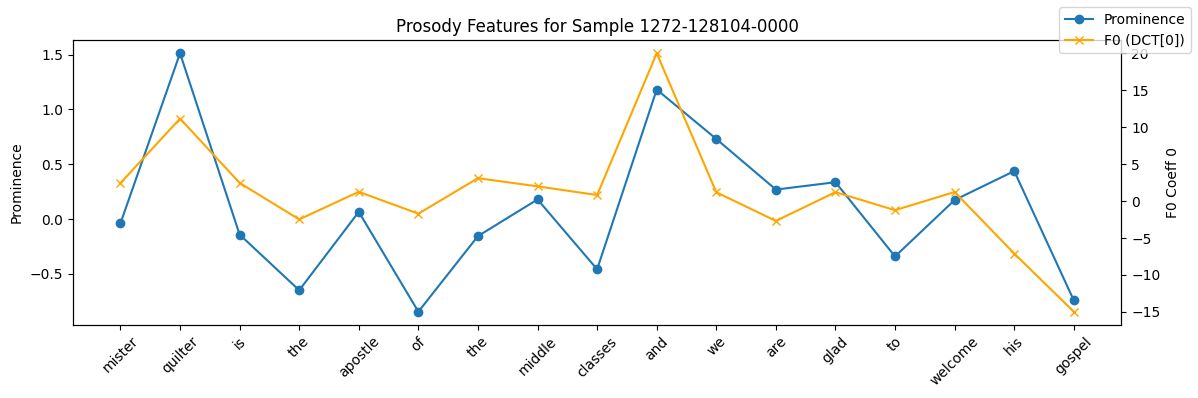

In [3]:
plot_prosody_features(extractor, idx=0)  # try different indices


In [6]:
import os
import json
import numpy as np

def make_json_serializable(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, dict):
        return {k: make_json_serializable(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [make_json_serializable(i) for i in obj]
    return obj

def save_features_to_json(extractor, output_dir="output_json"):
    os.makedirs(output_dir, exist_ok=True)

    for sample in extractor.samples:
        filename = sample["filename"]
        output_path = os.path.join(output_dir, f"{filename}.json")

        # Ensure everything inside is serializable
        serializable_sample = make_json_serializable(sample)

        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(serializable_sample, f, ensure_ascii=False, indent=2)

    print(f"✅ Saved {len(extractor.samples)} JSON files to: {output_dir}")


In [7]:
save_features_to_json(
    extractor,
    output_dir=r"C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\json_features"
)


✅ Saved 2703 JSON files to: C:\Users\10935\Desktop\Master\Spring 2025\DSC 291 Cognitive mod\final_project\Motherese\Data\Train\librispeech_asr\dev-clean\json_features
